In [3]:
#preprocess step

import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# USING FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASETS
train_identity_data = pd.read_csv(r"C:\Users\nh013\Desktop\ieee fraud detection\train_identity.csv")
train_transaction_data = pd.read_csv(r"C:\Users\nh013\Desktop\ieee fraud detection\train_transaction.csv")
test_identity_data = pd.read_csv(r"C:\Users\nh013\Desktop\ieee fraud detection\test_identity.csv")
test_transaction_data = pd.read_csv(r"C:\Users\nh013\Desktop\ieee fraud detection\test_transaction.csv")



# TRAIN DATASET FEATURE
train_df = train_identity_data[['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
                                               'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
                                               'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
                                               'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
                                               'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
                                               'DeviceType', 'DeviceInfo']]

# ELECT NUMERIC COLUMN
train_numeric_columns = train_df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMN TO FLOAT
train_numeric_columns = train_numeric_columns.astype(float)

# ELECT CATEGORICAL COLUMN
train_categorical_columns = train_df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMN
label_encoder = LabelEncoder()
train_categorical_columns = train_categorical_columns.apply(label_encoder.fit_transform)

#CONCATINATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMN
train_df = pd.concat([train_numeric_columns, train_categorical_columns], axis=1)


# TRAIN DATASET FEATURE
train_df = train_transaction_data[['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
                                                    'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
                                                    'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
                                                    'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
                                                    'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
                                                    'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3',
                                                    'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
                                                    'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
                                                    'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
                                                    'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36',
                                                    'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46',
                                                    'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56',
                                                    'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66',
                                                    'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76',
                                                    'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86',
                                                    'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96',
                                                    'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105',
                                                    'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114',
                                                    'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123',
                                                    'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132',
                                                    'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141',
                                                    'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150',
                                                    'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159',
                                                    'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168',
                                                    'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177',
                                                    'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186',
                                                    'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195',
                                                    'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204',
                                                    'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213',
                                                    'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222',
                                                    'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231',
                                                    'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240',
                                                    'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249',
                                                    'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258',
                                                    'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267',
                                                    'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276',
                                                    'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285',
                                                    'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294',
                                                    'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303',
                                                    'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312',
                                                    'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321',
                                                    'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330',
                                                    'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339']]


# ELECT NUMERIC COLUMN
train_numeric_columns = train_df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMN TO FLOAT
train_numeric_columns = train_numeric_columns.astype(float)

# ELECT CATEGORICAL COLUMN
train_categorical_columns = train_df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMN
label_encoder = LabelEncoder()
train_categorical_columns = train_categorical_columns.apply(label_encoder.fit_transform)

#CONCATINATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMN
train_df = pd.concat([train_numeric_columns, train_categorical_columns], axis=1)






# TEST DATASET FEATURE
test_df = test_identity_data[['TransactionID', 'id-01', 'id-02', 'id-03', 'id-04', 'id-05', 'id-06',
                                             'id-07', 'id-08', 'id-09', 'id-10', 'id-11', 'id-12', 'id-13', 'id-14',
                                             'id-15', 'id-16', 'id-17', 'id-18', 'id-19', 'id-20', 'id-21', 'id-22',
                                             'id-23', 'id-24', 'id-25', 'id-26', 'id-27', 'id-28', 'id-29', 'id-30',
                                             'id-31', 'id-32', 'id-33', 'id-34', 'id-35', 'id-36', 'id-37', 'id-38',
                                             'DeviceType', 'DeviceInfo']]



# ELECT NUMERIC COLUMN
test_numeric_columns = test_df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMN TO FLOAT
test_numeric_columns = test_numeric_columns.astype(float)

# ELECT CATEGORICAL COLUMN
test_categorical_columns = test_df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMN
test_categorical_columns = test_categorical_columns.apply(label_encoder.fit_transform)

# CONCATENATE NUMRIC AND LABEL ENCODED CATEGORICAL COLUMN
test_df = pd.concat([test_numeric_columns, test_categorical_columns], axis=1)




# TEST DATASET FEATURE
test_df = test_transaction_data[['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
                                                  'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2',
                                                  'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3',
                                                  'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14',
                                                  'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12',
                                                  'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
                                                  'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
                                                  'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22',
                                                  'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
                                                  'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
                                                  'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52',
                                                  'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62',
                                                  'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72',
                                                  'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82',
                                                  'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92',
                                                  'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102',
                                                  'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111',
                                                  'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120',
                                                  'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129',
                                                  'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138',
                                                  'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147',
                                                  'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156',
                                                  'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165',
                                                  'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174',
                                                  'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183',
                                                  'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192',
                                                  'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201',
                                                  'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210',
                                                  'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219',
                                                  'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228',
                                                  'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237',
                                                  'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246',
                                                  'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255',
                                                  'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264',
                                                  'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273',
                                                  'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V280', 'V281', 'V282',
                                                  'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291',
                                                  'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300',
                                                  'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309',
                                                  'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318',
                                                  'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327',
                                                  'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336',
                                                  'V337', 'V338', 'V339']]



# ELECT NUMERIC COLUMN
test_numeric_columns = test_df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMN TO FLOAT
test_numeric_columns = test_numeric_columns.astype(float)

# ELECT CATEGORICAL COLUMN
test_categorical_columns = test_df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMN
test_categorical_columns = test_categorical_columns.apply(label_encoder.fit_transform)

# CONCATENATE NUMRIC AND LABEL ENCODED CATEGORICAL COLUMN
test_df = pd.concat([test_numeric_columns, test_categorical_columns], axis=1)










# FILL MISSING IN TRAIN DATASET
train_df.fillna(train_df.mean(), inplace=True)  # Mean for numeric columns
train_df.fillna(train_df.mode().iloc[0], inplace=True)  # Mode for categorical columns



#FILL MISSING IN TEST DATASET
test_df.fillna(test_df.mean(), inplace=True)   # Mean for numeric columns
test_df.fillna(test_df.mode().iloc[0], inplace=True)  # Mode for categorical columns










# HANDLE OUTLIERS
train_df = handle_outliers(train_df, 'isFraud')

# NORMALIZE AND SCALING 
scaler = MinMaxScaler()
train_df[train_numeric_columns.columns] = scaler.fit_transform(train_df[train_numeric_columns.columns])





print(train_df.head())
print(train_df.shape)

print(test_df.head())
print(test_df.shape)



   TransactionID  isFraud  TransactionDT  TransactionAmt     card1     card2  \
0       0.000000      0.0   0.000000e+00        0.002137  0.743044  0.525111   
1       0.000002      0.0   6.359409e-08        0.000900  0.100885  0.608000   
2       0.000003      0.0   4.387992e-06        0.001840  0.210566  0.780000   
3       0.000005      0.0   6.295815e-06        0.001558  0.984824  0.934000   
4       0.000007      0.0   6.740974e-06        0.001558  0.201023  0.828000   

      card3     card5     addr1     addr2  ...  R_emaildomain  M1  M2  M3  M4  \
0  0.381679  0.306569  0.488636  0.831461  ...             60   1   1   1   2   
1  0.381679  0.014599  0.511364  0.831461  ...             60   2   2   2   0   
2  0.381679  0.481752  0.522727  0.831461  ...             60   1   1   1   0   
3  0.381679  0.124088  0.854545  0.831461  ...             60   2   2   2   0   
4  0.381679  0.014599  0.727273  0.831461  ...             60   2   2   2   3   

   M5  M6  M7  M8  M9  
0   0   

       TransactionID   isFraud  TransactionDT  TransactionAmt          card1  \
count  569877.000000  569877.0  569877.000000   569877.000000  569877.000000   
mean        0.499221       0.0       0.462608        0.004204       0.512271   
std         0.289151       0.0       0.294055        0.007496       0.282000   
min         0.000000       0.0       0.000000        0.000000       0.000000   
25%         0.247769       0.0       0.185965        0.001369       0.288515   
50%         0.499219       0.0       0.456941        0.002137       0.500747   
75%         0.750118       0.0       0.710151        0.003750       0.760462   
max         1.000000       0.0       1.000000        1.000000       1.000000   

               card2          card3          card5          addr1  \
count  569877.000000  569877.000000  569877.000000  569877.000000   
mean        0.524911       0.403534       0.726572       0.433301   
std         0.313088       0.083129       0.298547       0.219050   
min

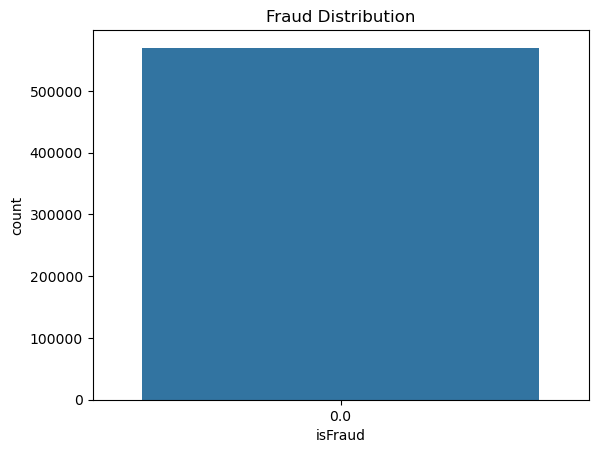

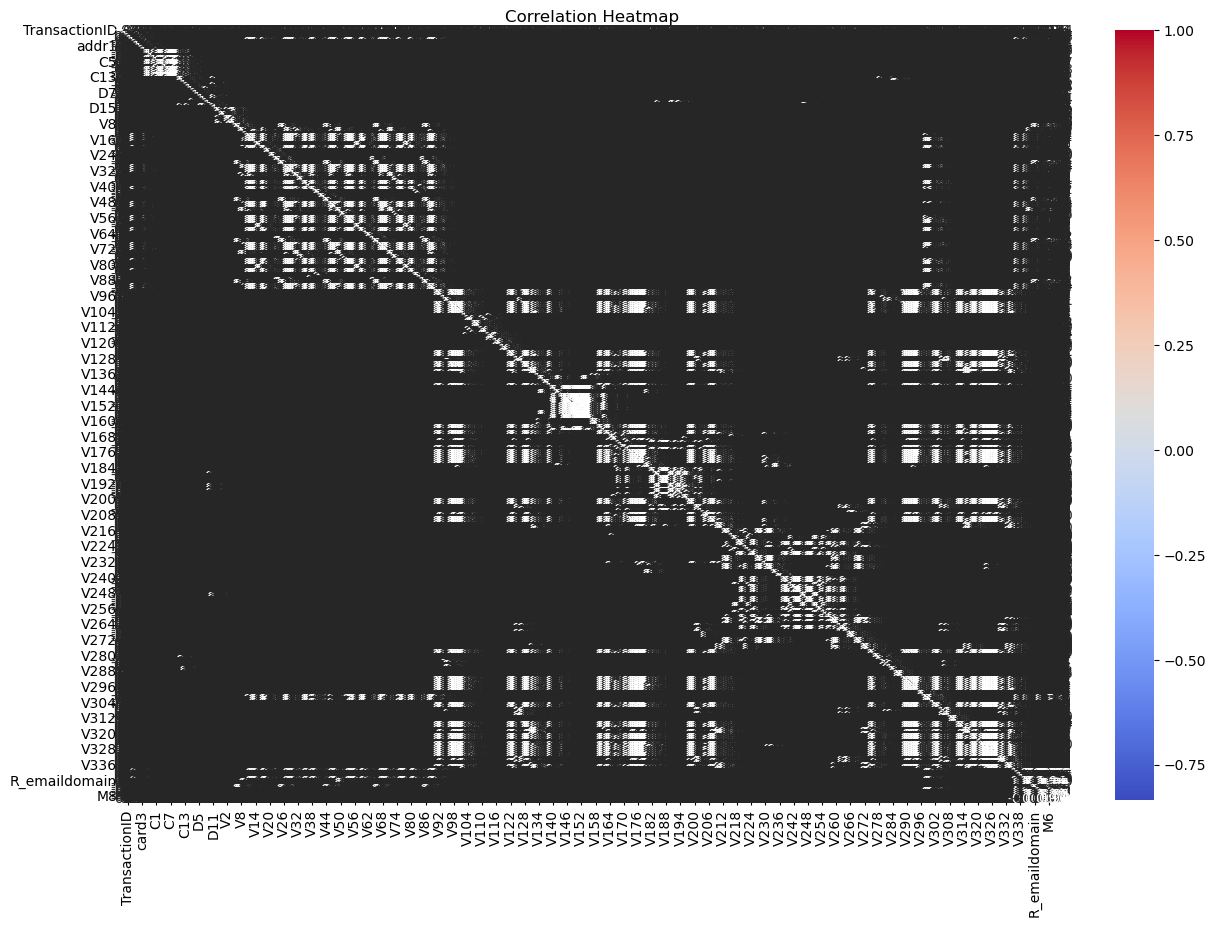

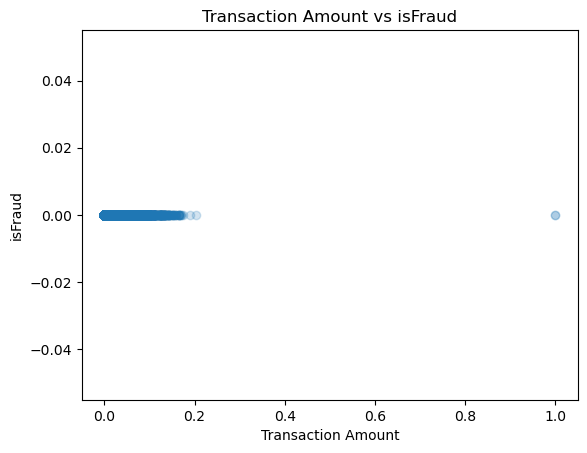

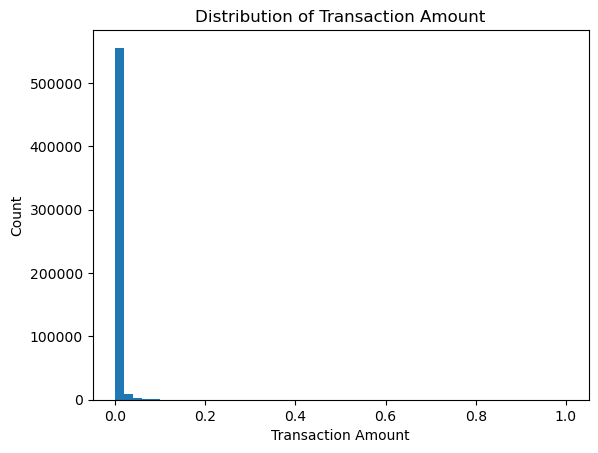

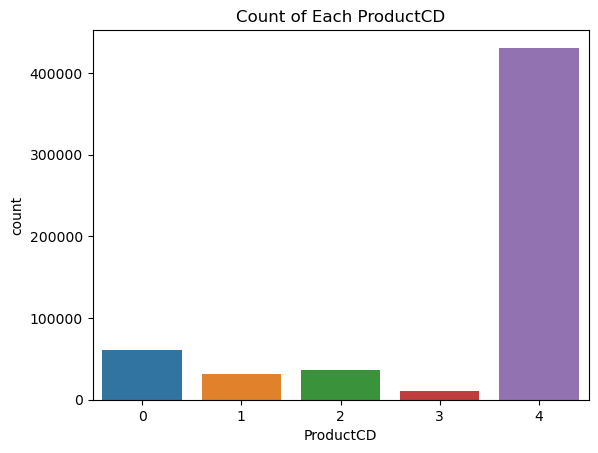

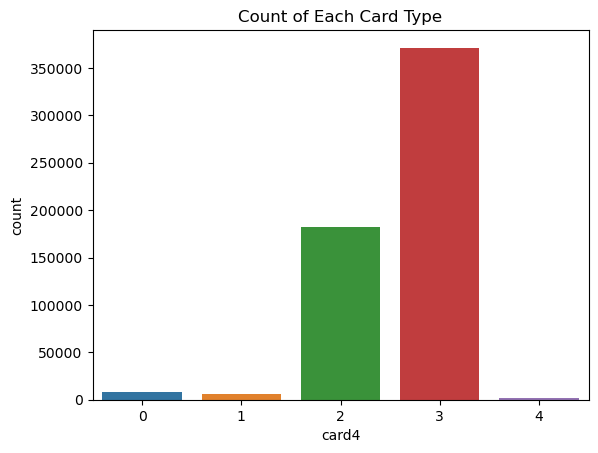

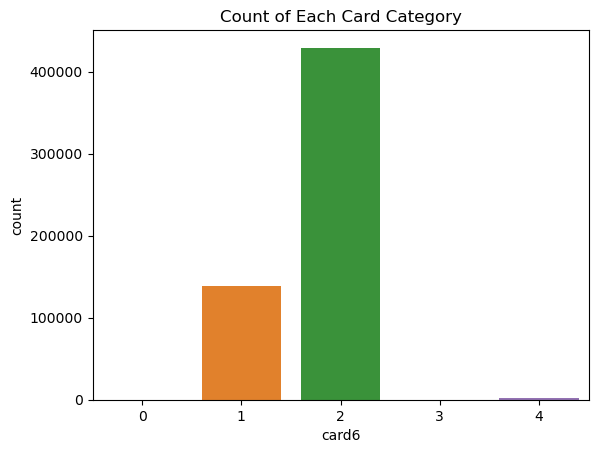

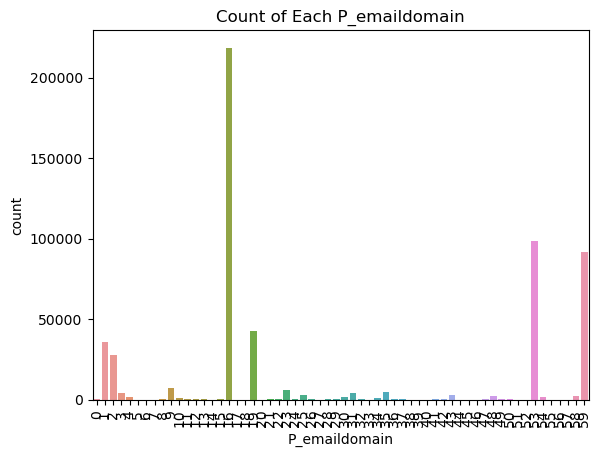

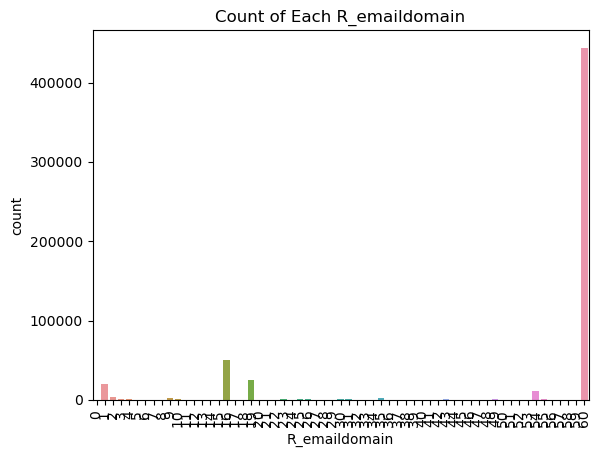

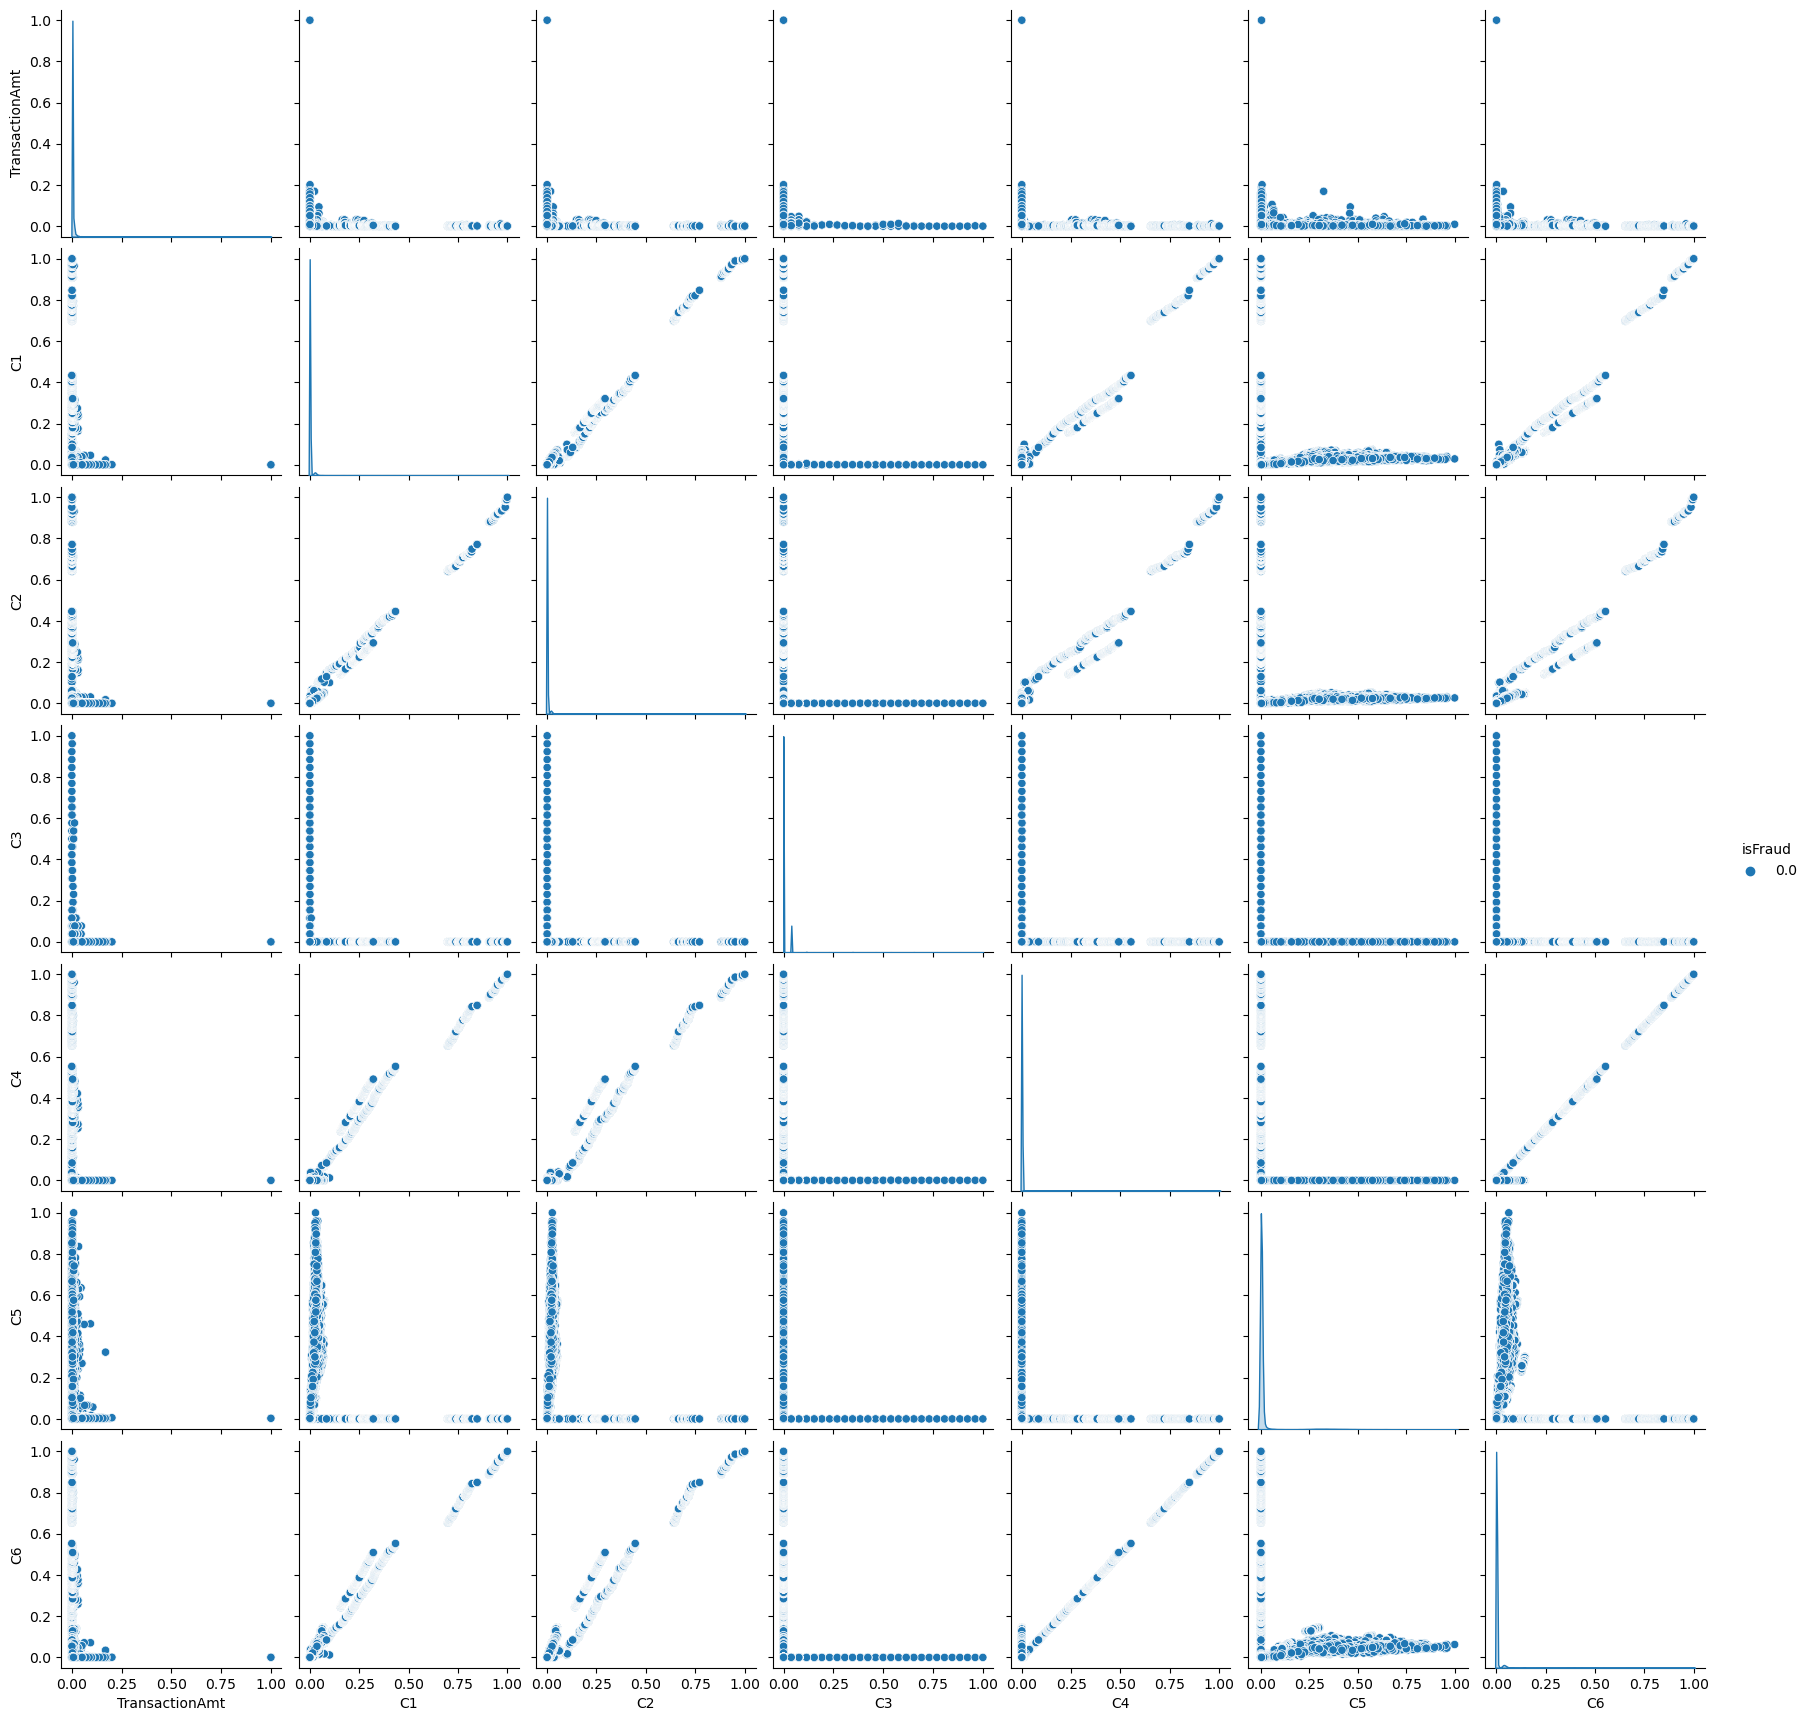

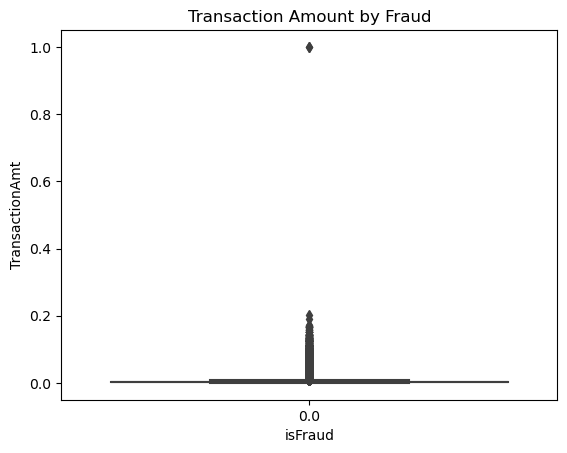

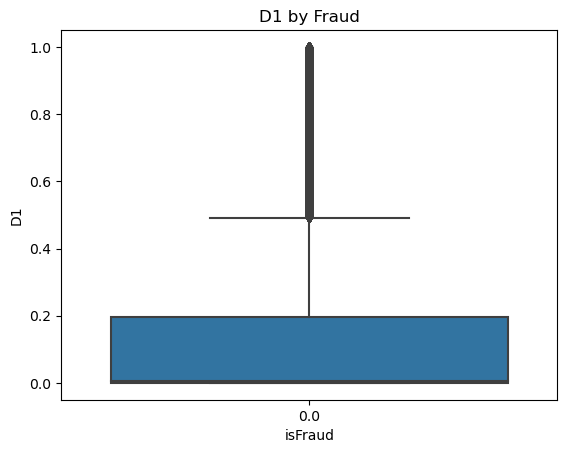

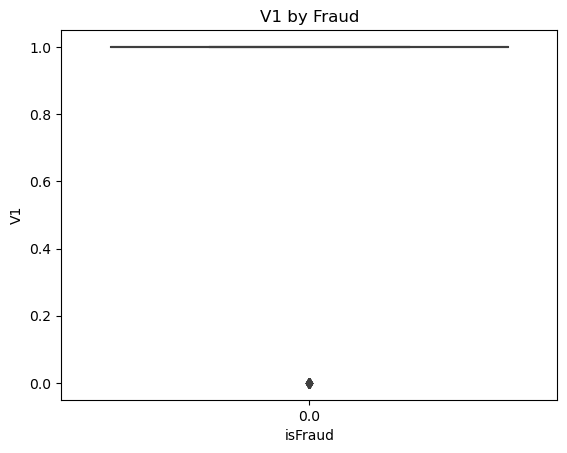

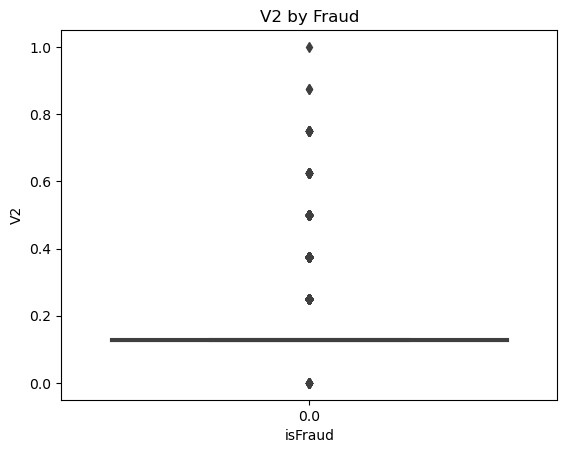

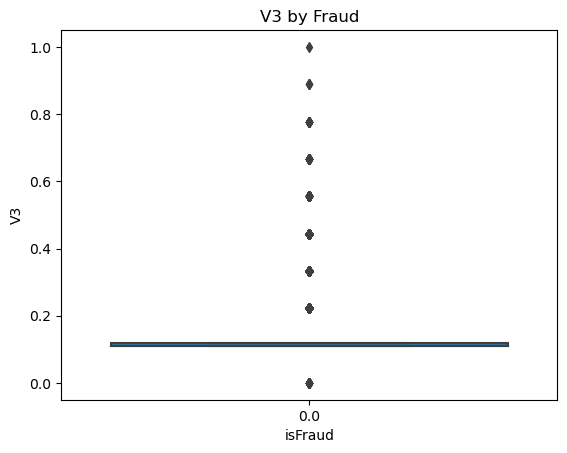

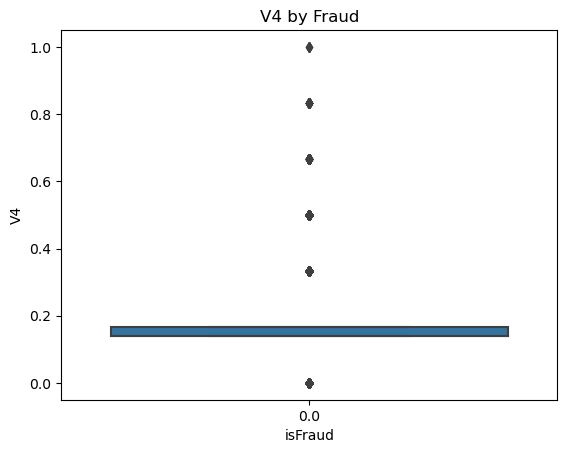

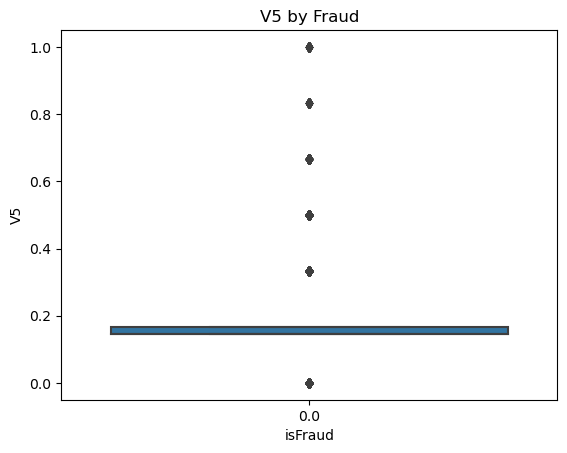

In [4]:
# EDA analysis.....

import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# USING FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASETS
train_identity_data = pd.read_csv(r"C:\Users\nh013\Desktop\ieee fraud detection\train_identity.csv")
train_transaction_data = pd.read_csv(r"C:\Users\nh013\Desktop\ieee fraud detection\train_transaction.csv")
test_identity_data = pd.read_csv(r"C:\Users\nh013\Desktop\ieee fraud detection\test_identity.csv")
test_transaction_data = pd.read_csv(r"C:\Users\nh013\Desktop\ieee fraud detection\test_transaction.csv")



# TRAIN DATASET FEATURE
train_df = train_identity_data[['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
                                               'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
                                               'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
                                               'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
                                               'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
                                               'DeviceType', 'DeviceInfo']]

# ELECT NUMERIC COLUMN
train_numeric_columns = train_df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMN TO FLOAT
train_numeric_columns = train_numeric_columns.astype(float)

# ELECT CATEGORICAL COLUMN
train_categorical_columns = train_df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMN
label_encoder = LabelEncoder()
train_categorical_columns = train_categorical_columns.apply(label_encoder.fit_transform)

#CONCATINATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMN
train_df = pd.concat([train_numeric_columns, train_categorical_columns], axis=1)


# TRAIN DATASET FEATURE
train_df = train_transaction_data[['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
                                                    'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
                                                    'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
                                                    'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
                                                    'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
                                                    'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3',
                                                    'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
                                                    'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
                                                    'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
                                                    'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36',
                                                    'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46',
                                                    'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56',
                                                    'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66',
                                                    'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76',
                                                    'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86',
                                                    'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96',
                                                    'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105',
                                                    'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114',
                                                    'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123',
                                                    'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132',
                                                    'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141',
                                                    'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150',
                                                    'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159',
                                                    'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168',
                                                    'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177',
                                                    'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186',
                                                    'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195',
                                                    'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204',
                                                    'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213',
                                                    'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222',
                                                    'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231',
                                                    'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240',
                                                    'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249',
                                                    'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258',
                                                    'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267',
                                                    'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276',
                                                    'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285',
                                                    'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294',
                                                    'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303',
                                                    'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312',
                                                    'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321',
                                                    'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330',
                                                    'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339']]


# ELECT NUMERIC COLUMN
train_numeric_columns = train_df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMN TO FLOAT
train_numeric_columns = train_numeric_columns.astype(float)

# ELECT CATEGORICAL COLUMN
train_categorical_columns = train_df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMN
label_encoder = LabelEncoder()
train_categorical_columns = train_categorical_columns.apply(label_encoder.fit_transform)

#CONCATINATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMN
train_df = pd.concat([train_numeric_columns, train_categorical_columns], axis=1)






# TEST DATASET FEATURE
test_df = test_identity_data[['TransactionID', 'id-01', 'id-02', 'id-03', 'id-04', 'id-05', 'id-06',
                                             'id-07', 'id-08', 'id-09', 'id-10', 'id-11', 'id-12', 'id-13', 'id-14',
                                             'id-15', 'id-16', 'id-17', 'id-18', 'id-19', 'id-20', 'id-21', 'id-22',
                                             'id-23', 'id-24', 'id-25', 'id-26', 'id-27', 'id-28', 'id-29', 'id-30',
                                             'id-31', 'id-32', 'id-33', 'id-34', 'id-35', 'id-36', 'id-37', 'id-38',
                                             'DeviceType', 'DeviceInfo']]



# ELECT NUMERIC COLUMN
test_numeric_columns = test_df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMN TO FLOAT
test_numeric_columns = test_numeric_columns.astype(float)

# ELECT CATEGORICAL COLUMN
test_categorical_columns = test_df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMN
test_categorical_columns = test_categorical_columns.apply(label_encoder.fit_transform)

# CONCATENATE NUMRIC AND LABEL ENCODED CATEGORICAL COLUMN
test_df = pd.concat([test_numeric_columns, test_categorical_columns], axis=1)




# TEST DATASET FEATURE
test_df = test_transaction_data[['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
                                                  'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2',
                                                  'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3',
                                                  'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14',
                                                  'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12',
                                                  'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
                                                  'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
                                                  'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22',
                                                  'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
                                                  'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
                                                  'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52',
                                                  'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62',
                                                  'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72',
                                                  'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82',
                                                  'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92',
                                                  'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102',
                                                  'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111',
                                                  'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120',
                                                  'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129',
                                                  'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138',
                                                  'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147',
                                                  'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156',
                                                  'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165',
                                                  'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174',
                                                  'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183',
                                                  'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192',
                                                  'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201',
                                                  'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210',
                                                  'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219',
                                                  'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228',
                                                  'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237',
                                                  'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246',
                                                  'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255',
                                                  'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264',
                                                  'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273',
                                                  'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V280', 'V281', 'V282',
                                                  'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291',
                                                  'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300',
                                                  'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309',
                                                  'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318',
                                                  'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327',
                                                  'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336',
                                                  'V337', 'V338', 'V339']]



# ELECT NUMERIC COLUMN
test_numeric_columns = test_df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMN TO FLOAT
test_numeric_columns = test_numeric_columns.astype(float)

# ELECT CATEGORICAL COLUMN
test_categorical_columns = test_df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMN
test_categorical_columns = test_categorical_columns.apply(label_encoder.fit_transform)

# CONCATENATE NUMRIC AND LABEL ENCODED CATEGORICAL COLUMN
test_df = pd.concat([test_numeric_columns, test_categorical_columns], axis=1)










# FILL MISSING IN TRAIN DATASET
train_df.fillna(train_df.mean(), inplace=True)  # Mean for numeric columns
train_df.fillna(train_df.mode().iloc[0], inplace=True)  # Mode for categorical columns



#FILL MISSING IN TEST DATASET
test_df.fillna(test_df.mean(), inplace=True)   # Mean for numeric columns
test_df.fillna(test_df.mode().iloc[0], inplace=True)  # Mode for categorical columns










# HANDLE OUTLIERS
train_df = handle_outliers(train_df, 'isFraud')

# NORMALIZE AND SCALING 
scaler = MinMaxScaler()
train_df[train_numeric_columns.columns] = scaler.fit_transform(train_df[train_numeric_columns.columns])





# EDA ANALYSIS

print(train_df.describe())

# PLOT THE DISTRIBUTION OF 'isFraud'
sns.countplot(x='isFraud', data=train_df)
plt.title('Fraud Distribution')
plt.show()

# EXPLORE CORRELETION BETWEEN FEATURES
plt.figure(figsize=(15, 10))
sns.heatmap(train_df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# SCATTER PLOT OF 'TransactionAmt' AGAINST 'isFraud'
plt.scatter(train_df['TransactionAmt'], train_df['isFraud'], alpha=0.2)
plt.xlabel('Transaction Amount')
plt.ylabel('isFraud')
plt.title('Transaction Amount vs isFraud')
plt.show()

# DISTRIBUTION OF TRANSECTION AMOUNT
plt.hist(train_df['TransactionAmt'], bins=50)
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.title('Distribution of Transaction Amount')
plt.show()

# PLOTTING THE COUNT OF EACH 'ProductCD'
sns.countplot(x='ProductCD', data=train_df)
plt.title('Count of Each ProductCD')
plt.show()

# COUNT PLOT OF  'card4'
sns.countplot(x='card4', data=train_df)
plt.title('Count of Each Card Type')
plt.show()

# COUNT PLOT OF 'card6'
sns.countplot(x='card6', data=train_df)
plt.title('Count of Each Card Category')
plt.show()

# COUNT PLOT OF 'P_emaildomain'
sns.countplot(x='P_emaildomain', data=train_df)
plt.title('Count of Each P_emaildomain')
plt.xticks(rotation=90)
plt.show()

# COUNT PLOT OF 'R_emaildomain'
sns.countplot(x='R_emaildomain', data=train_df)
plt.title('Count of Each R_emaildomain')
plt.xticks(rotation=90)
plt.show()

# PAIRPLOT OF SOME NUMERIC FEATURE
sns.pairplot(train_df[['TransactionAmt', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'isFraud']], hue='isFraud')
plt.show()

# BOXPLOT OF  'TransactionAmt' by 'isFraud'
sns.boxplot(x='isFraud', y='TransactionAmt', data=train_df)
plt.title('Transaction Amount by Fraud')
plt.show()

# BOXPLOT OF 'D1' by 'isFraud'
sns.boxplot(x='isFraud', y='D1', data=train_df)
plt.title('D1 by Fraud')
plt.show()

# BOXPLOT OF  'V1' by 'isFraud'
sns.boxplot(x='isFraud', y='V1', data=train_df)
plt.title('V1 by Fraud')
plt.show()

# BOXPLOT OF 'V2' by 'isFraud'
sns.boxplot(x='isFraud', y='V2', data=train_df)
plt.title('V2 by Fraud')
plt.show()

# BOXPLOT OF 'V3' by 'isFraud'
sns.boxplot(x='isFraud', y='V3', data=train_df)
plt.title('V3 by Fraud')
plt.show()

# BOXPLOT OF 'V4' by 'isFraud'
sns.boxplot(x='isFraud', y='V4', data=train_df)
plt.title('V4 by Fraud')
plt.show()

# BOXPLOT OF 'V5' by 'isFraud'
sns.boxplot(x='isFraud', y='V5', data=train_df)
plt.title('V5 by Fraud')
plt.show()


In [4]:
# PERFORM pca FEATURE ENGINEERING AND PERFORM NAIVE _BAYES MODEL..


import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# USING FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASETS
train_identity_data = pd.read_csv(r"C:\Users\nh013\Desktop\ieee fraud detection\train_identity.csv")
train_transaction_data = pd.read_csv(r"C:\Users\nh013\Desktop\ieee fraud detection\train_transaction.csv")
test_identity_data = pd.read_csv(r"C:\Users\nh013\Desktop\ieee fraud detection\test_identity.csv")
test_transaction_data = pd.read_csv(r"C:\Users\nh013\Desktop\ieee fraud detection\test_transaction.csv")



# TRAIN DATASET FEATURE
train_df = train_identity_data[['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
                                               'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
                                               'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
                                               'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
                                               'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
                                               'DeviceType', 'DeviceInfo']]

# ELECT NUMERIC COLUMN
train_numeric_columns = train_df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMN TO FLOAT
train_numeric_columns = train_numeric_columns.astype(float)

# ELECT CATEGORICAL COLUMN
train_categorical_columns = train_df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMN
label_encoder = LabelEncoder()
train_categorical_columns = train_categorical_columns.apply(label_encoder.fit_transform)

#CONCATINATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMN
train_df = pd.concat([train_numeric_columns, train_categorical_columns], axis=1)


# TRAIN DATASET FEATURE
train_df = train_transaction_data[['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
                                                    'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
                                                    'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
                                                    'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
                                                    'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
                                                    'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3',
                                                    'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
                                                    'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
                                                    'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
                                                    'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36',
                                                    'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46',
                                                    'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56',
                                                    'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66',
                                                    'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76',
                                                    'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86',
                                                    'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96',
                                                    'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105',
                                                    'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114',
                                                    'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123',
                                                    'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132',
                                                    'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141',
                                                    'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150',
                                                    'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159',
                                                    'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168',
                                                    'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177',
                                                    'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186',
                                                    'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195',
                                                    'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204',
                                                    'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213',
                                                    'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222',
                                                    'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231',
                                                    'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240',
                                                    'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249',
                                                    'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258',
                                                    'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267',
                                                    'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276',
                                                    'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285',
                                                    'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294',
                                                    'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303',
                                                    'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312',
                                                    'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321',
                                                    'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330',
                                                    'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339']]


# ELECT NUMERIC COLUMN
train_numeric_columns = train_df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMN TO FLOAT
train_numeric_columns = train_numeric_columns.astype(float)

# ELECT CATEGORICAL COLUMN
train_categorical_columns = train_df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMN
label_encoder = LabelEncoder()
train_categorical_columns = train_categorical_columns.apply(label_encoder.fit_transform)

#CONCATINATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMN
train_df = pd.concat([train_numeric_columns, train_categorical_columns], axis=1)






# TEST DATASET FEATURE
test_df = test_identity_data[['TransactionID', 'id-01', 'id-02', 'id-03', 'id-04', 'id-05', 'id-06',
                                             'id-07', 'id-08', 'id-09', 'id-10', 'id-11', 'id-12', 'id-13', 'id-14',
                                             'id-15', 'id-16', 'id-17', 'id-18', 'id-19', 'id-20', 'id-21', 'id-22',
                                             'id-23', 'id-24', 'id-25', 'id-26', 'id-27', 'id-28', 'id-29', 'id-30',
                                             'id-31', 'id-32', 'id-33', 'id-34', 'id-35', 'id-36', 'id-37', 'id-38',
                                             'DeviceType', 'DeviceInfo']]



# ELECT NUMERIC COLUMN
test_numeric_columns = test_df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMN TO FLOAT
test_numeric_columns = test_numeric_columns.astype(float)

# ELECT CATEGORICAL COLUMN
test_categorical_columns = test_df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMN
test_categorical_columns = test_categorical_columns.apply(label_encoder.fit_transform)

# CONCATENATE NUMRIC AND LABEL ENCODED CATEGORICAL COLUMN
test_df = pd.concat([test_numeric_columns, test_categorical_columns], axis=1)




# TEST DATASET FEATURE
test_df = test_transaction_data[['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
                                                  'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2',
                                                  'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3',
                                                  'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14',
                                                  'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12',
                                                  'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
                                                  'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
                                                  'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22',
                                                  'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
                                                  'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
                                                  'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52',
                                                  'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62',
                                                  'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72',
                                                  'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82',
                                                  'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92',
                                                  'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102',
                                                  'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111',
                                                  'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120',
                                                  'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129',
                                                  'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138',
                                                  'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147',
                                                  'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156',
                                                  'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165',
                                                  'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174',
                                                  'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183',
                                                  'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192',
                                                  'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201',
                                                  'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210',
                                                  'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219',
                                                  'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228',
                                                  'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237',
                                                  'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246',
                                                  'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255',
                                                  'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264',
                                                  'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273',
                                                  'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V280', 'V281', 'V282',
                                                  'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291',
                                                  'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300',
                                                  'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309',
                                                  'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318',
                                                  'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327',
                                                  'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336',
                                                  'V337', 'V338', 'V339']]



# ELECT NUMERIC COLUMN
test_numeric_columns = test_df.select_dtypes(include='number')

# CONVERT NUMERIC COLUMN TO FLOAT
test_numeric_columns = test_numeric_columns.astype(float)

# ELECT CATEGORICAL COLUMN
test_categorical_columns = test_df.select_dtypes(include='object')

# LABEL ENCODING TO CATEGORICAL COLUMN
test_categorical_columns = test_categorical_columns.apply(label_encoder.fit_transform)

# CONCATENATE NUMRIC AND LABEL ENCODED CATEGORICAL COLUMN
test_df = pd.concat([test_numeric_columns, test_categorical_columns], axis=1)










# FILL MISSING IN TRAIN DATASET
train_df.fillna(train_df.mean(), inplace=True)  # Mean for numeric columns
train_df.fillna(train_df.mode().iloc[0], inplace=True)  # Mode for categorical columns



#FILL MISSING IN TEST DATASET
test_df.fillna(test_df.mean(), inplace=True)   # Mean for numeric columns
test_df.fillna(test_df.mode().iloc[0], inplace=True)  # Mode for categorical columns










# HANDLE OUTLIERS
train_df = handle_outliers(train_df, 'isFraud')

# NORMALIZE AND SCALING 
scaler = MinMaxScaler()
train_df[train_numeric_columns.columns] = scaler.fit_transform(train_df[train_numeric_columns.columns])

# SPLITTING DATA INTO FEATURES  (X) AND TARGET  (y)
X = train_df.drop(columns=['isFraud', 'TransactionID'])
y = train_df['isFraud']

# PCA
num_components = 50  
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X)

# SPLIT DATA INTO TRAING AND TESTING SET 
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# TRAINING NAIVE BAYES MODEL
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

#MAKE PREDICTION
y_pred = naive_bayes.predict(X_test)

# EEVALUATE THE MODEL 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)



#MAKE THE PREDICTION ON THE TEST SET
test_y_pred = naive_bayes.predict(test_X_pca)

# CREATE DATAFRAME FOR THE SUBMISSION FILE 
submission_df = pd.DataFrame({'TransactionID': test_df['TransactionID'], 'isFraud': test_y_pred})


submission_df.to_csv('submission.csv', index=False)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    113976

    accuracy                           1.00    113976
   macro avg       1.00      1.00      1.00    113976
weighted avg       1.00      1.00      1.00    113976

